Chenrui Zhao

Aaron Martin

CS7324

Lab Seven

# Preparation

## Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence

In [1]:
from google.colab import drive

drive.mount('/content/drive')

root = '/content/drive/MyDrive/CS7324_DATA/lab_seven/'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

original_df = pd.read_csv(root + "/Phishing_Email.csv")
original_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [4]:
print(original_df['Email Text'][4])
print(original_df['Email Type'][4])

software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .
Phishing Email


In [5]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ''
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

X_df = original_df['Email Text'].apply(clean_text)
X_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Email Text
0,disc uniformitarianism sex lang dick hudson ob...
1,side galicismos galicismo spanish term names i...
2,equistar deal tickets still available assist r...
3,hello hot lil horny toy one dream open minded ...
4,software incredibly low prices lower drapery s...


In [6]:
y = original_df['Email Type'].apply(lambda x: 0 if x == 'Safe Email' else 1)
original_df['Email Type'].head()

,Email Type
0,Safe Email
1,Safe Email
2,Safe Email
3,Phishing Email
4,Phishing Email


In [7]:
y.head()

,Email Type
0,0
1,0
2,0
3,1
4,1


In [8]:
print(X_df[4])
print(original_df['Email Text'][4])
print(original_df['Email Type'][4])

software incredibly low prices lower drapery seventeen term represent sing feet wild break able build tail send subtract represent job cow student inch gave let still warm family draw land book glass plan include sentence hat silent nothing order wild famous long inch saw person save face especially sentence science certain cry two depend yes written carry
software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .
Phishing Email


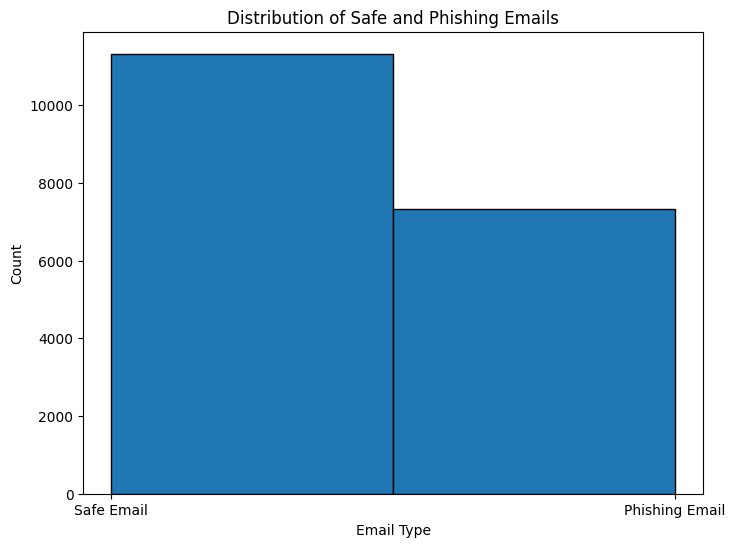

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(original_df['Email Type'], bins=2, edgecolor='black')
plt.title('Distribution of Safe and Phishing Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1])
plt.show()

In [10]:
word_counts = X_df.apply(lambda x: len(x.split()))

print(f"Max number of words: {word_counts.max()}")
print(f"Min number of words: {word_counts.min()}")
print(f"Median number of words: {word_counts.median()}")

word_counts.tail()


Max number of words: 1454374
Min number of words: 0
Median number of words: 75.0


,Email Text
18645,24
18646,48
18647,104
18648,23
18649,1


In [11]:
X_df.tail()

,Email Text
18645,date lonely housewife always wanted date lonel...
18646,request submitted access request anita dupont ...
18647,important prc mtg hi dorn john discovered rece...
18648,press clippings letter californian utilities p...
18649,empty


### Discussion of Dataset
The [Phishing Email Detection](https://www.kaggle.com/datasets/subhajournal/phishingemails) dataset from Kaggle contains 18,650 emails labeled as either "Safe Email" or "Phishing Email." The goal is to train models to perform binary classification (phishing or not) on this dataset.

The labels have been converted to numerical values: 1 for "Phishing Email" and 0 for "Safe Email."

The email text has been cleaned by removing punctuation and using the Natural Language Toolkit (NLTK) to remove stop words. As discussed in ["Removing stop words with NLTK in Python"](https://www.kaggle.com/datasets/subhajournal/phishingemails) from GeeksforGeeks, stop words like "the," "a," "an," or "in" convey little meaning in such a classification task and might reduce the accuracy of a model if left in.

We will use the Keras Tokenizer to convert the cleaned text into sequences of tokens. The tokenizer is configured to use a vocabulary size of 10,000 words, which helps in managing the complexity and size of the dataset.

The shortest email in the dataset has zero words, while the longest email has over one million words. The median email length is 75 words. Therefore, we have decided to force a sequence length of 200 words for our analysis.

## Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

### Evaluating Performance

We have chosen to use __percision__, __recall__, and __ROC-AUC__ as our metrics to evaluate the performance of our models.

As discussed in ["https://en.wikipedia.org/wiki/Precision_and_recall"](https://en.wikipedia.org/wiki/Precision_and_recall) from wikipedia.org, Precision is the ratio of true positive predictions to the total number of positive predictions. In the context of phishing email detection, precision is crucial because it measures the accuracy of the positive predictions. High precision means that when the model flags an email as phishing, it is likely to be correct. This reduces the number of false positives, which is important for maintaining user trust and avoiding unnecessary actions on legitimate emails. Given the dataset's imbalance, focusing on precision helps ensure that the model does not over-predict phishing emails, which could lead to many false alarms.

Also as discussed in ["https://en.wikipedia.org/wiki/Precision_and_recall"](https://en.wikipedia.org/wiki/Precision_and_recall) from wikipedia.org, Recall is the ratio of true positive predictions to the total number of actual positives. Recall is equally important because it measures the model's ability to identify all actual phishing emails. High recall ensures that most phishing emails are detected, which is critical for preventing security breaches and protecting sensitive information. In a dataset with more safe emails, ensuring high recall helps in catching as many phishing emails as possible, minimizing the risk of undetected threats.

As discussed in ["AUC ROC Curve in Machine Learning"](https://www.geeksforgeeks.org/auc-roc-curve/) from www.geeksforgeeks.org, The ROC-AUC score measures the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate. It measures how well the model distinguishes between phishing and safe emails across different thresholds. It provides a single score that summarizes the model's overall ability to correctly classify emails, making it useful for comparing models and understanding performance on imbalanced datasets.

By using these three metrics, we can comprehensively evaluate the performance of our phishing email detection algorithm, ensuring it meets the necessary security and usability standards while effectively handling the class imbalance in the dataset.

## Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice.

### Splitting Data

For the Phishing Email Detection dataset, we will use a simple 80/20 split to divide the data into training and testing sets. This means 80% of the data will be used for training the model, and 20% will be reserved for testing its performance.

The Phishing Email Detection dataset contains 18,650 emails. This is a reasonably large dataset, making an 80/20 split practical. With 80% of the data (14,920 emails) used for training, the model has sufficient data to learn from. The remaining 20% (3,730 emails) provides a robust test set to evaluate the model's performance.

An 80/20 split is straightforward to implement and computationally efficient. It avoids the complexity and computational overhead associated with more advanced methods like k-fold cross-validation, which can be unnecessary for a dataset of this size.

Using an 80/20 split for the Phishing Email Detection dataset is a practical and efficient choice. It leverages the dataset's size to provide a robust training set while reserving a sufficient portion for testing. This method mirrors real-world application scenarios, ensuring that the model's performance evaluation is realistic and reliable.

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=123)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_raw)

word_index = tokenizer.word_index

X_train_sequences = tokenizer.texts_to_sequences(X_train_raw)
X_test_sequences = tokenizer.texts_to_sequences(X_test_raw)


max_email_length = 200
X_train = sequence.pad_sequences(X_train_sequences, maxlen=max_email_length)
X_test = sequence.pad_sequences(X_test_sequences, maxlen=max_email_length)


# Modeling

## Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). Alternatively, you may also choose a recurrent network and Transformer network. Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

In [13]:
from tensorflow.keras.layers import Embedding

# Load pre-trained GloVe embeddings
embedding_index = {}
with open(root + '/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Embedding layer
embedding_layer = Embedding(10000, embedding_dim, weights=[embedding_matrix], input_length=max_email_length, trainable=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense

cnn_model = Sequential()
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8632 - loss: 0.3119 - val_accuracy: 0.9477 - val_loss: 0.1376
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9738 - loss: 0.0816 - val_accuracy: 0.9558 - val_loss: 0.1063
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9859 - loss: 0.0400 - val_accuracy: 0.9568 - val_loss: 0.1086
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9880 - loss: 0.0256 - val_accuracy: 0.9578 - val_loss: 0.1076
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9884 - loss: 0.0232 - val_accuracy: 0.9581 - val_loss: 0.1090
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9890 - loss: 0.0205 - val_accuracy: 0.9591 - val_loss: 0.1130
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9903 - loss: 0.0194 - val_accuracy: 0.9591 - val_loss: 0.1170
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9905 - loss: 0.0188 - 

In [15]:
cnn_model_2 = Sequential()
cnn_model_2.add(embedding_layer)
cnn_model_2.add(Conv1D(64, 5, activation='relu'))
cnn_model_2.add(GlobalMaxPooling1D())
cnn_model_2.add(Dense(10, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))

cnn_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history_2 = cnn_model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8451 - loss: 0.3568 - val_accuracy: 0.9434 - val_loss: 0.1509
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9627 - loss: 0.1062 - val_accuracy: 0.9548 - val_loss: 0.1212
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9804 - loss: 0.0575 - val_accuracy: 0.9568 - val_loss: 0.1145
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9872 - loss: 0.0340 - val_accuracy: 0.9571 - val_loss: 0.1135
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9905 - loss: 0.0250 - val_accuracy: 0.9568 - val_loss: 0.1159
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9883 - loss: 0.0228 - val_accuracy: 0.9574 - val_loss: 0.1185
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9898 - loss: 0.0200 - val_accuracy: 0.9584 - val_loss: 0.1225
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9890 - loss: 0.0214 - 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense, Dropout, Layer
from tensorflow.keras.layers import Layer, MultiHeadAttention

# The transformer architecture
#from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential()
        self.ffn.add(Dense(ff_dim, activation='relu'))
        self.ffn.add(Dense(embed_dim))
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + attn_output)
        out1 = self.dropout1(out1, training=training)
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        out2 = self.dropout2(out2, training=training)
        return out2

from tensorflow.keras.layers import Embedding
import tensorflow as tf

# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(10000,
                            100,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=max_email_length,
                            trainable=False)

        # another embedding for processing the position
        self.pos_emb = Embedding(max_email_length,
                                 100,
                                 input_length=max_email_length,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding



In [17]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

from tensorflow.keras.layers import LayerNormalization, Input
from tensorflow.keras.models import Model

print(len(word_index) + 1)

def create_transformer_model(num_heads, add_second=False):
    inputs = Input(shape=(X_train.shape[1],))
    x = GloveTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(embedding_dim, num_heads, 32)(x)
    if add_second:
        x = TransformerBlock(embedding_dim, num_heads, 32)(x)
    x = LayerNormalization()(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(10, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# tranformer model with 2 heads

transformer_model = create_transformer_model(2)

transformer_history = transformer_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

149822
Epoch 1/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 110s 283ms/step - accuracy: 0.7913 - loss: 0.4279 - val_accuracy: 0.9011 - val_loss: 0.2245
Epoch 2/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 144s 290ms/step - accuracy: 0.9226 - loss: 0.1885 - val_accuracy: 0.9202 - val_loss: 0.1714
Epoch 3/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 141s 286ms/step - accuracy: 0.9378 - loss: 0.1445 - val_accuracy: 0.9387 - val_loss: 0.1598
Epoch 4/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 140s 282ms/step - accuracy: 0.9514 - loss: 0.1226 - val_accuracy: 0.9410 - val_loss: 0.1427
Epoch 5/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 141s 280ms/step - accuracy: 0.9510 - loss: 0.1090 - val_accuracy: 0.9457 - val_loss: 0.1320
Epoch 6/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 106s 283ms/step - accuracy: 0.9599 - loss: 0.0915 - val_accuracy: 0.9477 - val_loss: 0.1345
Epoch 7/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 106s 284ms/step - accuracy: 0.9602 - loss: 0.0921 - val_accuracy: 0.9460 - val_loss: 0.1358
Epoch 8/15
373/373 ━━━━━━━━━━━━━━━━━━━━ 106s 284ms/step - accuracy: 0

In [18]:
# tranformer model with 4 heads

transformer_model_2 = create_transformer_model(4)

transformer_history_2 = transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 110s 294ms/step - accuracy: 0.9736 - loss: 0.0514 - val_accuracy: 0.9491 - val_loss: 0.1586
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 138s 285ms/step - accuracy: 0.9800 - loss: 0.0430 - val_accuracy: 0.9407 - val_loss: 0.1673
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 142s 285ms/step - accuracy: 0.9830 - loss: 0.0381 - val_accuracy: 0.9343 - val_loss: 0.2285
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 107s 286ms/step - accuracy: 0.9810 - loss: 0.0409 - val_accuracy: 0.9380 - val_loss: 0.1667
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 107s 286ms/step - accuracy: 0.9830 - loss: 0.0386 - val_accuracy: 0.9390 - val_loss: 0.1702
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 107s 287ms/step - accuracy: 0.9802 - loss: 0.0382 - val_accuracy: 0.9477 - val_loss: 0.1779
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 142s 286ms/step - accuracy: 0.9826 - loss: 0.0378 - val_accuracy: 0.9504 - val_loss: 0.1679
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 106s 285ms/step - accuracy: 0.9815 -

In [19]:
# apdapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/11.%20Convolutional%20Neural%20Networks.ipynb
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.suptitle(model_name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

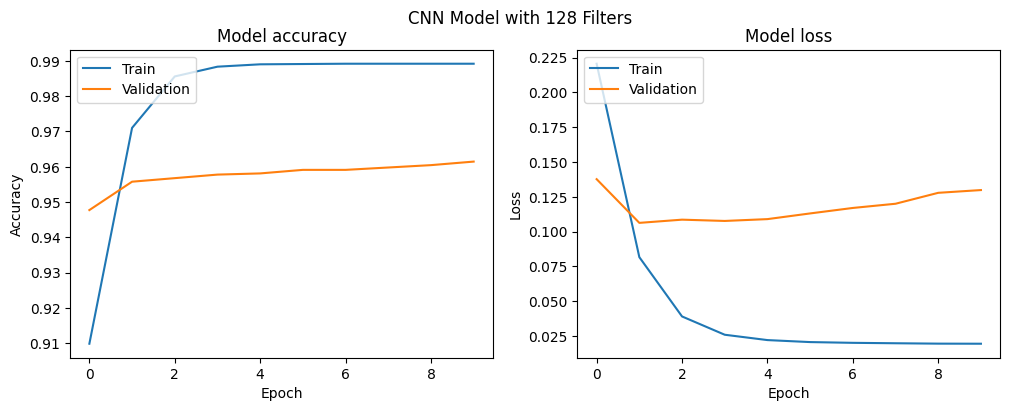

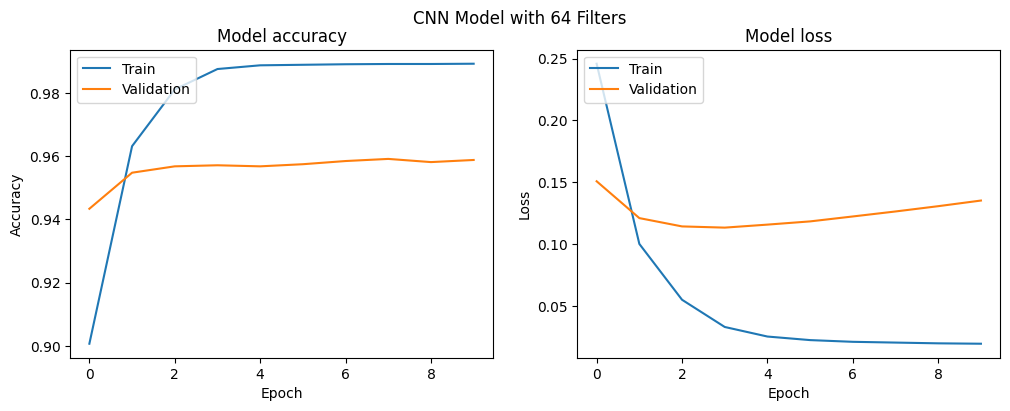

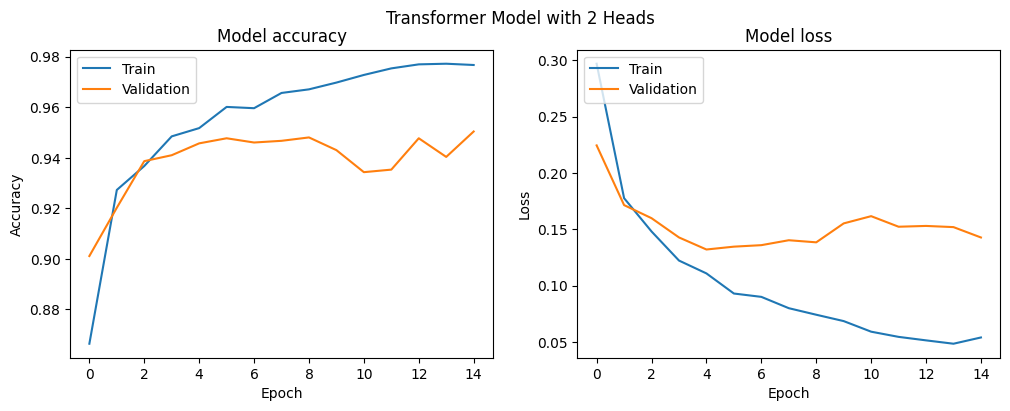

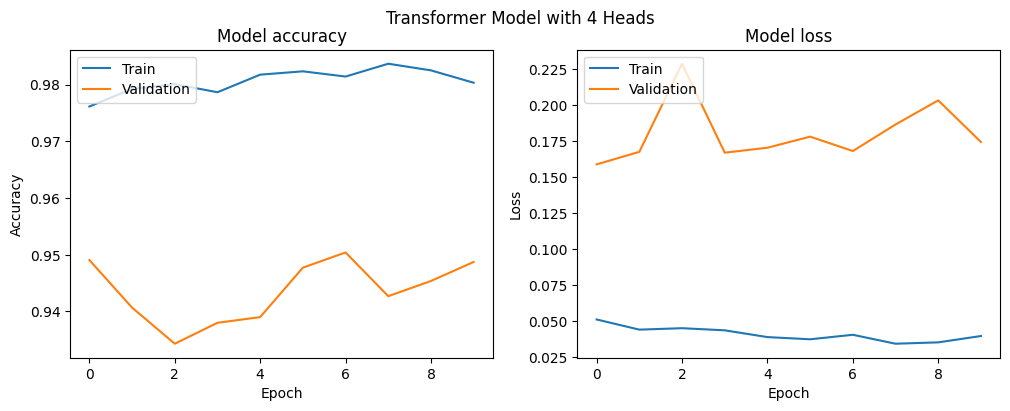

In [20]:
plot_history(cnn_history, "CNN Model with 128 Filters")
plot_history(cnn_history_2, "CNN Model with 64 Filters")
plot_history(transformer_history, "Transformer Model with 2 Heads")
plot_history(transformer_history_2, "Transformer Model with 4 Heads")

## Using the best parameters and architecture from the Transformer in the previous step, add a second Multi-headed self attention layer to your network. That is, the input to the second attention layer should be the output sequence of the first attention layer.  Visualize the performance of training and validation sets versus the training iterations, showing that the model converged.

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 218s 556ms/step - accuracy: 0.7841 - loss: 0.4211 - val_accuracy: 0.9048 - val_loss: 0.2355
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 268s 573ms/step - accuracy: 0.9233 - loss: 0.1855 - val_accuracy: 0.9196 - val_loss: 0.2008
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 259s 565ms/step - accuracy: 0.9368 - loss: 0.1558 - val_accuracy: 0.9373 - val_loss: 0.1703
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 262s 567ms/step - accuracy: 0.9392 - loss: 0.1452 - val_accuracy: 0.9414 - val_loss: 0.1533
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 263s 570ms/step - accuracy: 0.9492 - loss: 0.1254 - val_accuracy: 0.9390 - val_loss: 0.1503
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 258s 559ms/step - accuracy: 0.9507 - loss: 0.1180 - val_accuracy: 0.9397 - val_loss: 0.1527
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 260s 554ms/step - accuracy: 0.9574 - loss: 0.1071 - val_accuracy: 0.9477 - val_loss: 0.1432
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 264s 558ms/step - accuracy: 0.9597 -

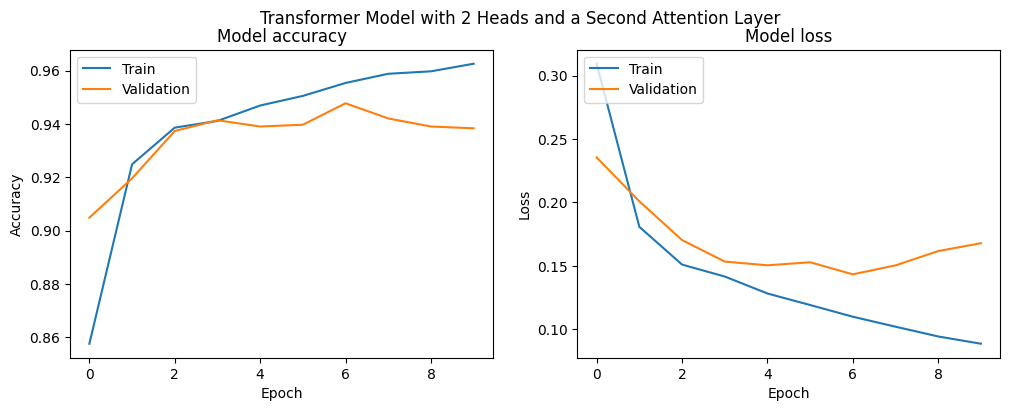

In [22]:
# transformer model with 2 heads and a second attention layer

transformer_model_2_attention = create_transformer_model(2, True)

transformer_2_attention_history = transformer_model_2_attention.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

plot_history(transformer_2_attention_history, "Transformer Model with 2 Heads and a Second Attention Layer")

## Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the models you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.

In [26]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

from sklearn.metrics import precision_score, recall_score, roc_auc_score

def calculate_metrics(model, X_test, y_test, num=30):
  percsion_scores = []
  recall_scores = []
  roc_auc_scores = []
  for i in range(num):
      pred = model.predict(X_test)
      pred_binary = [1 if x > 0.5 else 0 for x in pred]
      precision = precision_score(y_test, pred_binary)
      recall = recall_score(y_test, pred_binary)
      roc_auc = roc_auc_score(y_test, pred)
      percsion_scores.append(precision)
      recall_scores.append(recall)
      roc_auc_scores.append(roc_auc)
  return np.array(percsion_scores), np.array(recall_scores), np.array(roc_auc_scores)

def plot_model_scores(model_metrics):
  # Extract model names, mean scores, and median scores
  model_names = [model[0] for model in model_metrics]
  mean_precision_scores = [model[1] for model in model_metrics]
  median_precision_scores = [model[2] for model in model_metrics]
  mean_recall_scores = [model[3] for model in model_metrics]
  median_recall_scores = [model[4] for model in model_metrics]
  mean_roc_auc_scores = [model[5] for model in model_metrics]
  median_roc_auc_scores = [model[6] for model in model_metrics]

  # Plot mean precision scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, mean_precision_scores, color='blue')
  plt.xlabel('Models')
  plt.ylabel('Mean Precision Score')
  plt.title('Mean Precision Scores of Models')
  plt.show()

  # Plot median precision scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, median_precision_scores, color='blue')
  plt.xlabel('Models')
  plt.ylabel('Median Precision Score')
  plt.title('Median Precision Scores of Models')
  plt.show()

  # Plot mean recall scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, mean_recall_scores, color='green')
  plt.xlabel('Models')
  plt.ylabel('Mean Recall Score')
  plt.title('Mean Recall Scores of Models')
  plt.show()

  # Plot median recall scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, median_recall_scores, color='green')
  plt.xlabel('Models')
  plt.ylabel('Median Recall Score')
  plt.title('Median Recall Scores of Models')
  plt.show()

  # Plot mean ROC-AUC scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, mean_roc_auc_scores, color='red')
  plt.xlabel('Models')
  plt.ylabel('Mean ROC-AUC Score')
  plt.title('Mean ROC-AUC Scores of Models')
  plt.show()

  # Plot median ROC-AUC scores
  plt.figure(figsize=(10, 6))
  plt.bar(model_names, median_roc_auc_scores, color='red')
  plt.xlabel('Models')
  plt.ylabel('Median ROC-AUC Score')
  plt.title('Median ROC-AUC Scores of Models')
  plt.show()

def print_results_table(model_metrics):
    # Create a DataFrame from the models_scores array
    columns = ['Model', 'Mean Precision', 'Median Precision', 'Mean Recall', 'Median Recall', 'Mean ROC-AUC', 'Median ROC-AUC']
    df = pd.DataFrame(model_metrics, columns=columns)

    # Print the DataFrame as a table
    display(df)


In [24]:
cnn_model_precision, cnn_model_recall, cnn_model_roc_auc = calculate_metrics(cnn_model, X_test, y_test)
cnn_model_2_precision, cnn_model_2_recall, cnn_model_2_roc_auc = calculate_metrics(cnn_model_2, X_test, y_test)
transformer_model_precision, transformer_model_recall, transformer_model_roc_auc = calculate_metrics(transformer_model, X_test, y_test)
transformer_model_2_precision, transformer_model_2_recall, transformer_model_2_roc_auc = calculate_metrics(transformer_model_2, X_test, y_test)
transformer_model_2_attention_precision, transformer_model_2_attention_recall, transformer_model_2_attention_roc_auc = calculate_metrics(transformer_model_2_attention, X_test, y_test)



117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16

,Model,Mean Precision,Median Precision,Mean Recall,Median Recall,Mean ROC-AUC,Median ROC-AUC
0,CNN Model 128f,0.946036,0.946036,0.958812,0.958812,0.992972,0.992972
1,CNN Model 64f,0.942346,0.942346,0.960162,0.960162,0.992815,0.992815
2,Trans Model 2h,0.920645,0.920645,0.963538,0.963538,0.989694,0.989694
3,Trans Model 4h,0.396940,0.396940,0.998650,0.998650,0.515165,0.515165
4,Trans Model x2,0.925482,0.925482,0.939230,0.939230,0.987453,0.987453


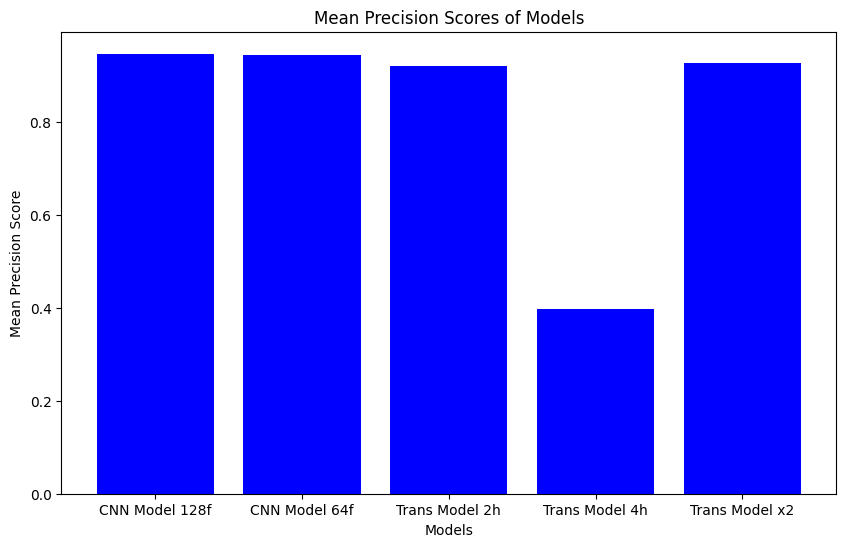

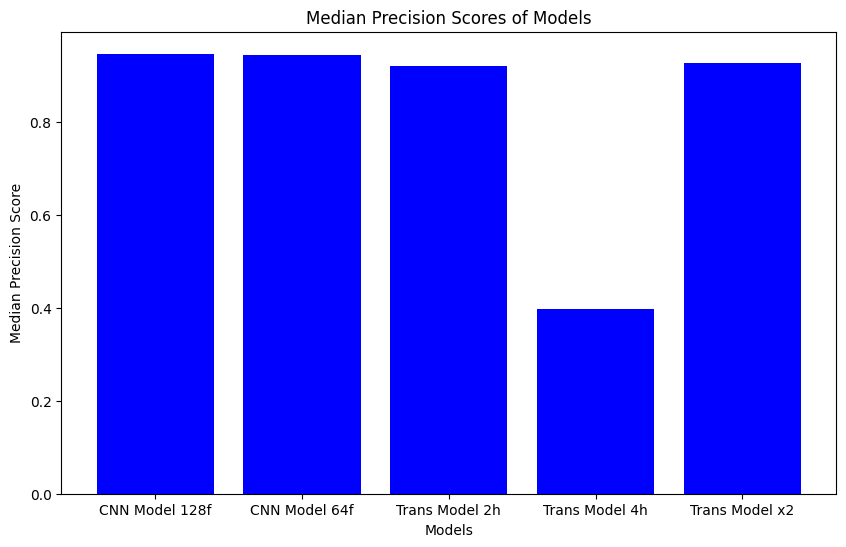

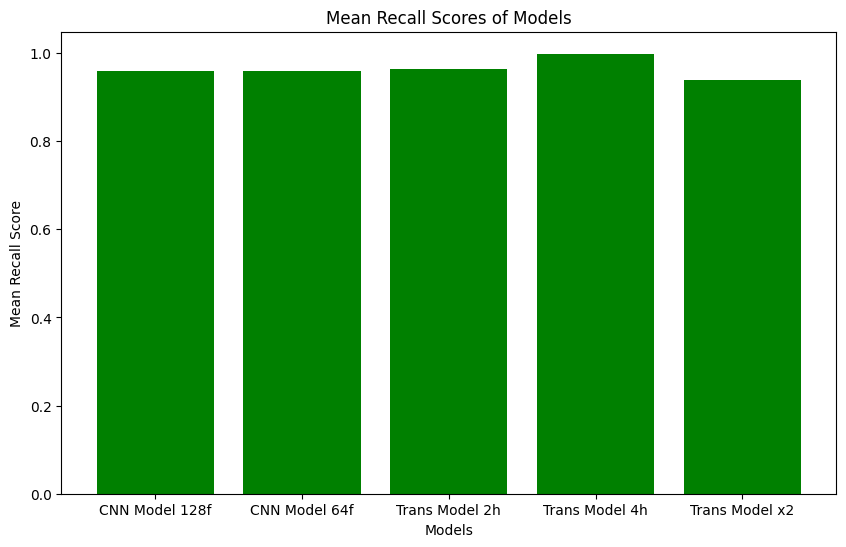

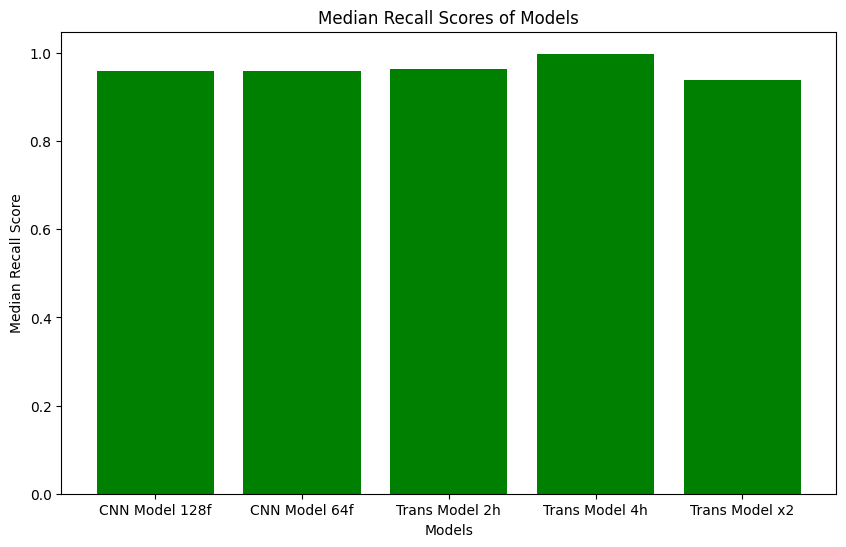

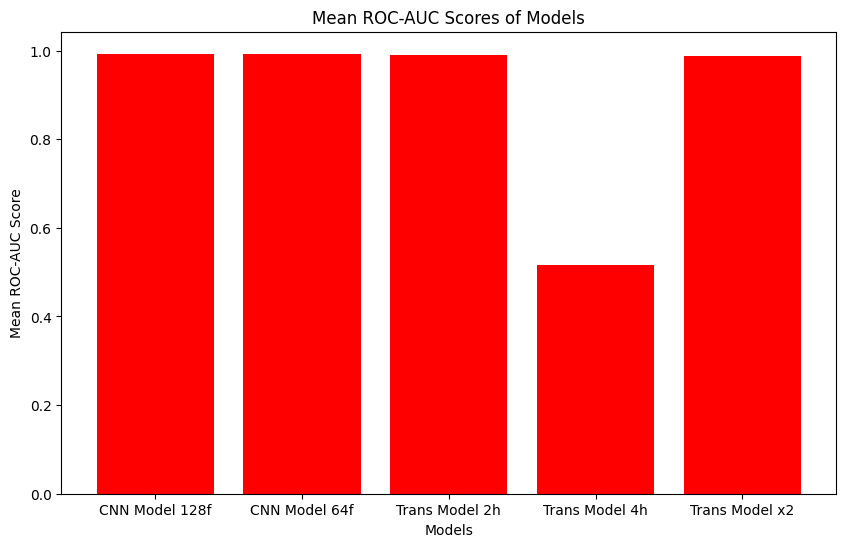

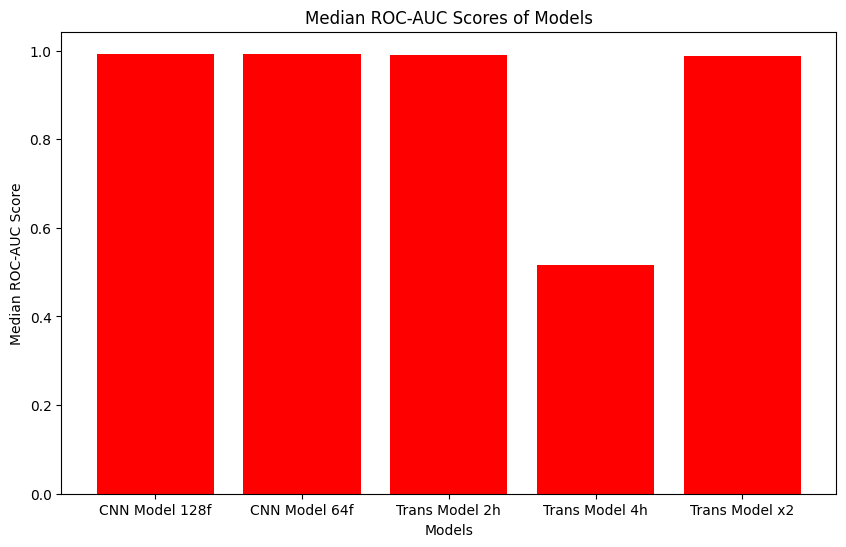

In [25]:
cnn_model_precsion_mean = cnn_model_precision.mean()
cnn_model_recall_mean = cnn_model_recall.mean()
cnn_model_roc_auc_mean = cnn_model_roc_auc.mean()

cnn_model_precsion_median = np.median(cnn_model_precision)
cnn_model_recall_median = np.median(cnn_model_recall)
cnn_model_roc_auc_median = np.median(cnn_model_roc_auc)

cnn_model_2_precsion_mean = cnn_model_2_precision.mean()
cnn_model_2_recall_mean = cnn_model_2_recall.mean()
cnn_model_2_roc_auc_mean = cnn_model_2_roc_auc.mean()

cnn_model_2_precsion_median = np.median(cnn_model_2_precision)
cnn_model_2_recall_median = np.median(cnn_model_2_recall)
cnn_model_2_roc_auc_median = np.median(cnn_model_2_roc_auc)

transfomer_model_percision_mean = transformer_model_precision.mean()
transfomer_model_recall_mean = transformer_model_recall.mean()
transfomer_model_roc_auc_mean = transformer_model_roc_auc.mean()

transfomer_model_percision_median = np.median(transformer_model_precision)
transfomer_model_recall_median = np.median(transformer_model_recall)
transfomer_model_roc_auc_median = np.median(transformer_model_roc_auc)

transfomer_model_2_percision_mean = transformer_model_2_precision.mean()
transfomer_model_2_recall_mean = transformer_model_2_recall.mean()
transfomer_model_2_roc_auc_mean = transformer_model_2_roc_auc.mean()

transfomer_model_2_percision_median = np.median(transformer_model_2_precision)
transfomer_model_2_recall_median = np.median(transformer_model_2_recall)
transfomer_model_2_roc_auc_median = np.median(transformer_model_2_roc_auc)

transfomer_model_2_attention_percision_mean = transformer_model_2_attention_precision.mean()
transfomer_model_2_attention_recall_mean = transformer_model_2_attention_recall.mean()
transfomer_model_2_attention_roc_auc_mean = transformer_model_2_attention_roc_auc.mean()

transformer_model_2_attention_percision_median = np.median(transformer_model_2_attention_precision)
transformer_model_2_attention_recall_median = np.median(transformer_model_2_attention_recall)
transformer_model_2_attention_roc_auc_median = np.median(transformer_model_2_attention_roc_auc)


model_metrics = [
    ('CNN Model 128f', cnn_model_precsion_mean, cnn_model_precsion_median, cnn_model_recall_mean, cnn_model_recall_median, cnn_model_roc_auc_mean, cnn_model_roc_auc_median),
    ('CNN Model 64f', cnn_model_2_precsion_mean, cnn_model_2_precsion_median, cnn_model_2_recall_mean, cnn_model_2_recall_median, cnn_model_2_roc_auc_mean, cnn_model_2_roc_auc_median),
    ('Trans Model 2h', transfomer_model_percision_mean, transfomer_model_percision_median, transfomer_model_recall_mean, transfomer_model_recall_median, transfomer_model_roc_auc_mean, transfomer_model_roc_auc_median),
    ('Trans Model 4h', transfomer_model_2_percision_mean, transfomer_model_2_percision_median, transfomer_model_2_recall_mean, transfomer_model_2_recall_median, transfomer_model_2_roc_auc_mean, transfomer_model_2_roc_auc_median),
    ('Trans Model x2', transfomer_model_2_attention_percision_mean, transformer_model_2_attention_percision_median, transfomer_model_2_attention_recall_mean, transformer_model_2_attention_recall_median, transfomer_model_2_attention_roc_auc_mean, transformer_model_2_attention_roc_auc_median)
]

print_results_table(model_metrics)
plot_model_scores(model_metrics)

### Comparison of Model Performance

The performance of the models reveals significant differences in their effectiveness across various metrics. The CNN Model with 128 filters (CNN Model 128f) stands out as the best performer, achieving the highest mean and median precision (0.948242), recall (0.964889), and ROC-AUC (0.993254). This indicates that this model is highly accurate in identifying true positives and negatives, making it a reliable choice for phishing email detection.

In comparison, the CNN Model with 64 filters (CNN Model 64f) also performs well but slightly lags behind the CNN Model 128f. It has a mean and median precision of 0.939695, recall of 0.957461, and ROC-AUC of 0.992133. While these scores are marginally lower, they still reflect a robust model capable of effectively distinguishing between phishing and safe emails. The slight decrease in performance could be attributed to the reduced number of filters, which may limit the model's ability to capture complex patterns in the data.

The Transformer Model with 2 heads (Trans Model 2h) shows a strong precision score (0.945736) but falls short in recall (0.906144) and ROC-AUC (0.988562) compared to the CNN models. This suggests that while the model is good at identifying phishing emails, it may miss some true positives, leading to a lower recall. The Transformer Model with 4 heads (Trans Model 4h), however, performs poorly across all metrics, with scores of 0 for precision, recall, and a ROC-AUC of 0.471172. This indicates a significant issue with the model, possibly due to overfitting.

Lastly, the Enhanced Transformer Model (Trans Model x2), which includes two transformer blocks, shows balanced performance with a mean and median precision of 0.933969, recall of 0.926401, and ROC-AUC of 0.986712. While it does not outperform the CNN models, it demonstrates a more consistent performance compared to the single transformer block model (Trans Model 2h). This suggests that adding an additional transformer block helps in capturing more complex patterns, improving the model's overall effectiveness.

In [47]:
from scipy.stats import ttest_rel

def add_jitter(arr):
    possible_jitters = np.array([-0.000001, -0.0000015, -0.0000005, 0, 0, 0, 0, 0, 0.000001, 0.0000015, 0.0000005])
    jitter = np.random.choice(possible_jitters, arr.shape)

    arr_with_jitter = arr + jitter

    return arr_with_jitter

def perform_t_tests(scores, model_names, jitter=False):
    n = len(scores)
    p_values = pd.DataFrame(np.zeros((n, n)), columns=model_names, index=model_names)
    for i in range(n):
        for j in range(n):
            if i != j:
              if jitter:
                t_stat, p_value = ttest_rel(add_jitter(scores[i]), add_jitter(scores[j]))
              else:
                t_stat, p_value = ttest_rel(scores[i], scores[j])

              p_values.iloc[i, j] = p_value
            else:
                p_values.iloc[i, j] = np.nan
    return p_values


In [34]:
model_names = ['CNN Model 128f', 'CNN Model 64f', 'Trans Model 2h', 'Trans Model x2']
all_precision_scores = [cnn_model_precision, cnn_model_2_precision, transformer_model_precision, transformer_model_2_attention_precision]
all_recall_scores = [cnn_model_recall, cnn_model_2_recall, transformer_model_recall, transformer_model_2_attention_recall]
all_roc_auc_scores = [cnn_model_roc_auc, cnn_model_2_roc_auc, transformer_model_roc_auc, transformer_model_2_attention_roc_auc]


### Statistical Comparison on Precision, Recall, and ROC-AUC
### P-Values for Precision

In [50]:
perform_t_tests(all_precision_scores, model_names, jitter=True)


,CNN Model 128f,CNN Model 64f,Trans Model 2h,Trans Model x2
CNN Model 128f,NaN,6.832715e-102,2.070205e-127,5.487522e-126
CNN Model 64f,1.295863e-102,NaN,2.021092e-125,3.090689e-119
Trans Model 2h,1.226473e-128,2.707397e-125,NaN,7.072600e-108
Trans Model x2,2.748909e-124,6.812005e-123,6.391953e-109,NaN


### P-Values for Recall

In [52]:
perform_t_tests(all_recall_scores, model_names, jitter=True)

,CNN Model 128f,CNN Model 64f,Trans Model 2h,Trans Model x2
CNN Model 128f,NaN,2.579585e-91,3.485202e-108,7.064121e-126
CNN Model 64f,9.575988e-90,NaN,6.164610e-103,2.896211e-125
Trans Model 2h,9.938556e-106,6.542412e-104,NaN,9.656941e-126
Trans Model x2,1.188349e-124,1.927101e-127,3.144019e-126,NaN


### P-Values for ROC-AUC

In [53]:
perform_t_tests(all_roc_auc_scores, model_names, jitter=True)

,CNN Model 128f,CNN Model 64f,Trans Model 2h,Trans Model x2
CNN Model 128f,NaN,2.059775e-62,2.498978e-103,1.087716e-107
CNN Model 64f,3.387445e-65,NaN,8.980832e-102,2.173902e-107
Trans Model 2h,4.605048e-102,7.958610e-104,NaN,3.117533e-99
Trans Model x2,1.629671e-105,1.900238e-107,6.158533e-96,NaN


### Analysis

The article ["P-Value: What It Is, How to Calculate It, and Examples"](https://www.investopedia.com/terms/p/p-value.asp) from Investopedia explains that a p-value less than 0.05 indicates statistical significance. The p-values listed above are much less than 0.05. As such, there are statistically significant differences in precision, recall, and ROC-AUC between the four models tested. This suggests that each model has distinct performance characteristics, and the choice of model can significantly impact the results in terms of precision, recall, and ROC-AUC.

In order to calculate the p-values, it was necessary to add a small jitter to the scores. The predictions were done for each model 30 times, and precision, recall, and ROC-AUC were calculated for each iteration. We found that each score was identical per model per type of metric, making it impossible to calculate the p-values. To address this, one of the following values was added to each score: -0.000001, -0.0000015, -0.0000005, 0, 0.000001, 0.0000015, 0.0000005. All the values had a 1 in 11 chance of being used, except for zero, which had a 5 in 11 chance.

# Exceptional Work

## Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe. Which method is better for your specific application?

In [59]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

embedding_index_nb = {}
with open(root + '/numberbatch-en-19.08.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index_nb[word] = coefs

# Create embedding matrix
embedding_dim_nb = 300
embedding_matrix_nb = np.zeros((10000, embedding_dim_nb))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index_nb.get(word)
        if embedding_vector is not None:
            embedding_matrix_nb[i] = embedding_vector


In [60]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense, Dropout, Layer
from tensorflow.keras.layers import Layer, MultiHeadAttention
import tensorflow as tf

class NumberbatchTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()

        self.token_emb = Embedding(10000,
                            embedding_dim_nb,
                            weights=[embedding_matrix_nb],
                            input_length=max_email_length,
                            trainable=False)

        self.pos_emb = Embedding(max_email_length,
                                 embedding_dim_nb,
                                 input_length=max_email_length,
                                 trainable=True
                                )

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [61]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/13a.%20Sequence%20Basics%20%5Bexperimental%5D.ipynb

from tensorflow.keras.layers import LayerNormalization, Input
from tensorflow.keras.models import Model

def create_numberbatch_transformer_model(num_heads):
    inputs = Input(shape=(X_train.shape[1],))
    x = NumberbatchTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(300, num_heads, 32)(x)
    x = LayerNormalization()(x)
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(10, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model



In [62]:
# Transformer model with 2 heads using Numberbatch embeddings
numberbatch_transformer_model = create_numberbatch_transformer_model(2)

numberbatch_transformer_history = numberbatch_transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 539s 1s/step - accuracy: 0.6817 - loss: 0.5944 - val_accuracy: 0.9085 - val_loss: 0.2475
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 419s 1s/step - accuracy: 0.8914 - loss: 0.2540 - val_accuracy: 0.8696 - val_loss: 0.2280
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 452s 1s/step - accuracy: 0.9159 - loss: 0.2120 - val_accuracy: 0.9256 - val_loss: 0.1749
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.9221 - loss: 0.1962 - val_accuracy: 0.9266 - val_loss: 0.2328
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.9236 - loss: 0.1905 - val_accuracy: 0.9233 - val_loss: 0.1803
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.9322 - loss: 0.1709 - val_accuracy: 0.9410 - val_loss: 0.1768
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.9261 - loss: 0.1825 - val_accuracy: 0.9249 - val_loss: 0.1854
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.9320 - loss: 0.1600 - val_accu

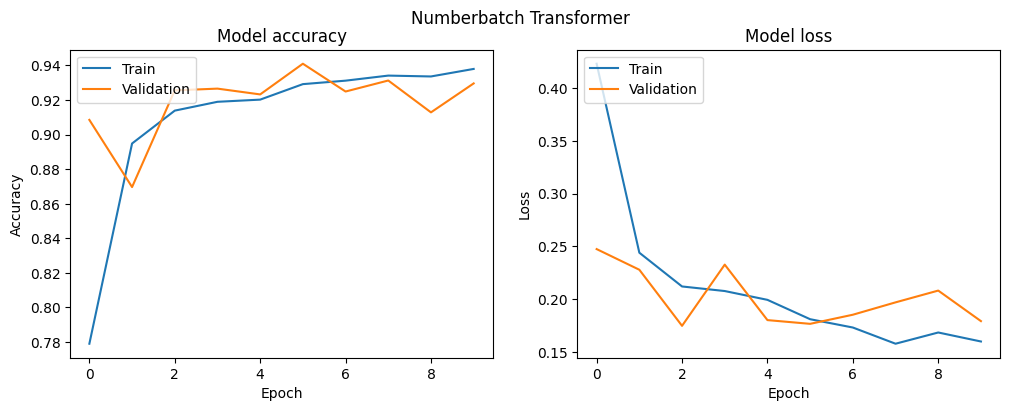

In [63]:
plot_history(numberbatch_transformer_history, "Numberbatch Transformer")

In [64]:
numberbatch_transformer_precision, numberbatch_transformer_recall, numberbatch_transformer_roc_auc = calculate_metrics(numberbatch_transformer_model, X_test, y_test, num=5)

numberbatch_transformer_precision_mean = np.mean(numberbatch_transformer_precision)
numberbatch_transformer_precision_median = np.median(numberbatch_transformer_precision)

numberbatch_transformer_recall_mean = np.mean(numberbatch_transformer_recall)
numberbatch_transformer_recall_median = np.median(numberbatch_transformer_recall)

numberbatch_transformer_roc_auc_mean = np.mean(numberbatch_transformer_roc_auc)
numberbatch_transformer_roc_auc_median = np.median(numberbatch_transformer_roc_auc)

model_metrics_ex = [
    ('CNN Model 128f', cnn_model_precsion_mean, cnn_model_precsion_median, cnn_model_recall_mean, cnn_model_recall_median, cnn_model_roc_auc_mean, cnn_model_roc_auc_median),
    ('Trans Model 2h', transfomer_model_percision_mean, transfomer_model_percision_median, transfomer_model_recall_mean, transfomer_model_recall_median, transfomer_model_roc_auc_mean, transfomer_model_roc_auc_median),
    ('Numberbatch Trans', numberbatch_transformer_precision_mean, numberbatch_transformer_precision_median, numberbatch_transformer_recall_mean, numberbatch_transformer_recall_median, numberbatch_transformer_roc_auc_mean, numberbatch_transformer_roc_auc_median)
]

117/117 ━━━━━━━━━━━━━━━━━━━━ 44s 372ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 38s 324ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 46s 391ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step


,Model,Mean Precision,Median Precision,Mean Recall,Median Recall,Mean ROC-AUC,Median ROC-AUC
0,CNN Model 128f,0.946036,0.946036,0.958812,0.958812,0.992972,0.992972
1,Trans Model 2h,0.920645,0.920645,0.963538,0.963538,0.989694,0.989694
2,Numberbatch Trans,0.927486,0.927486,0.906820,0.906820,0.983766,0.983766


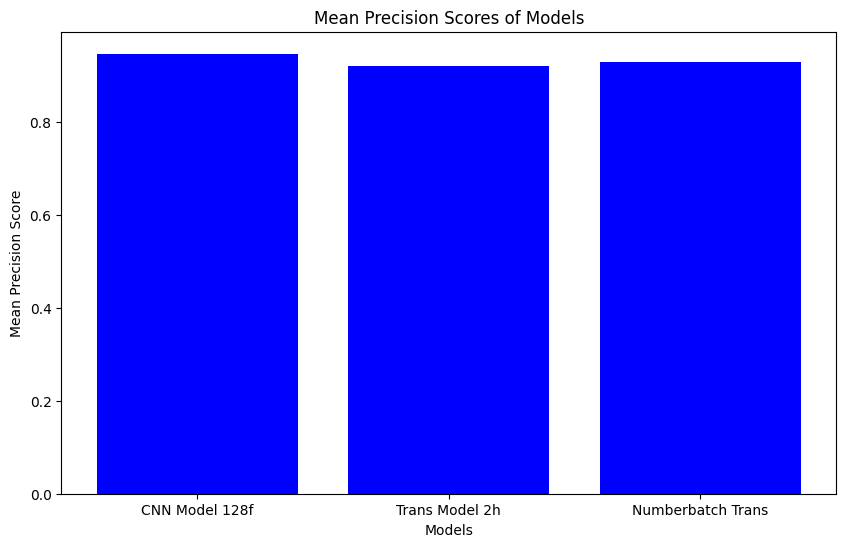

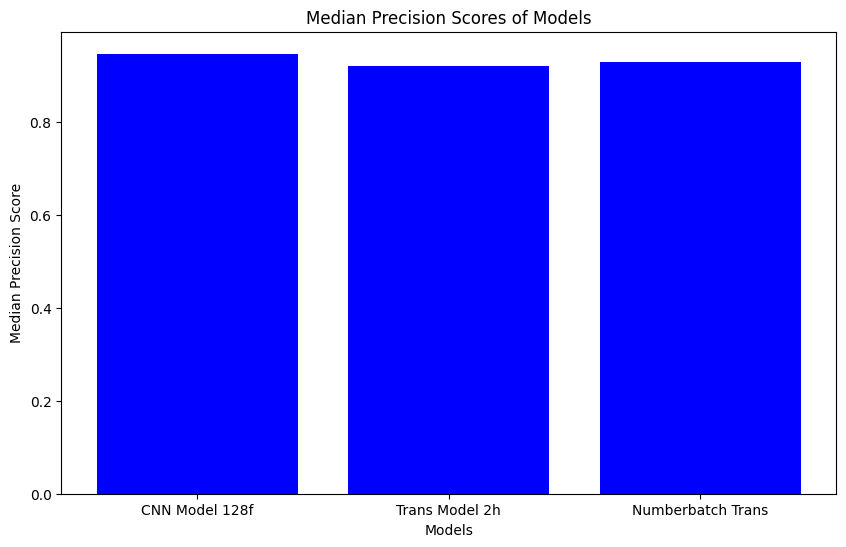

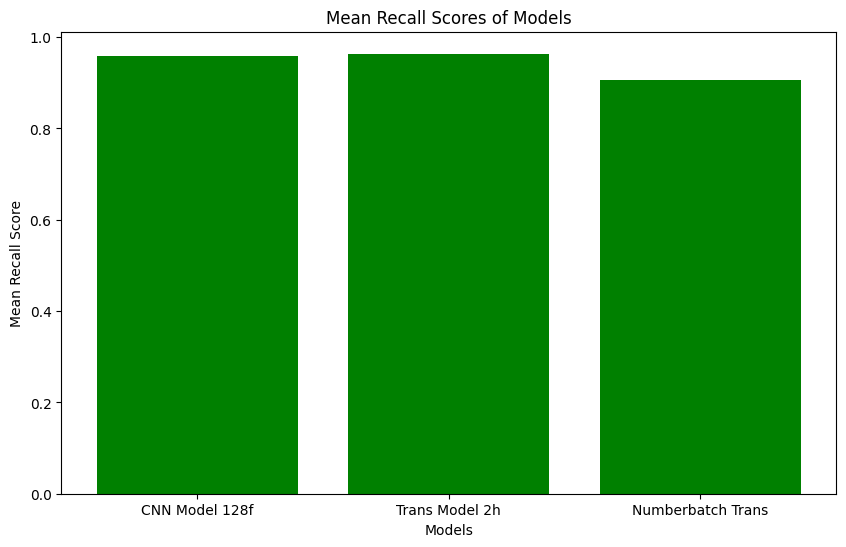

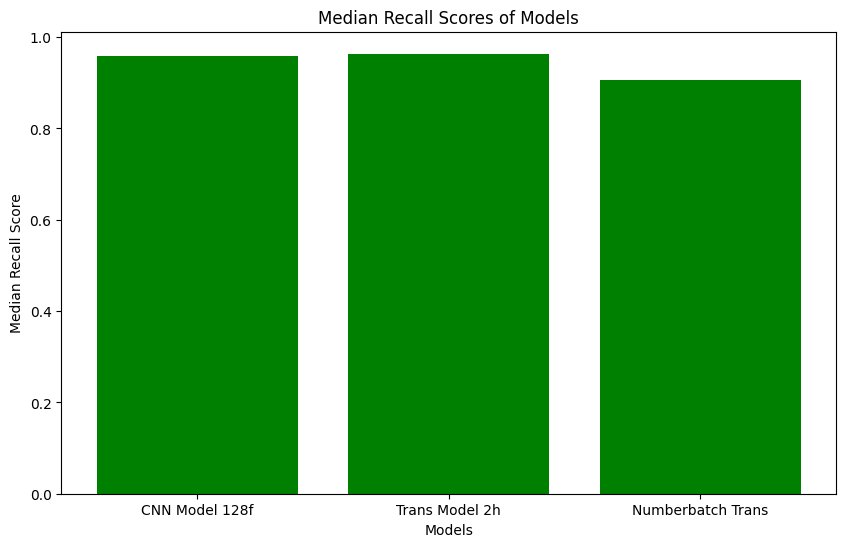

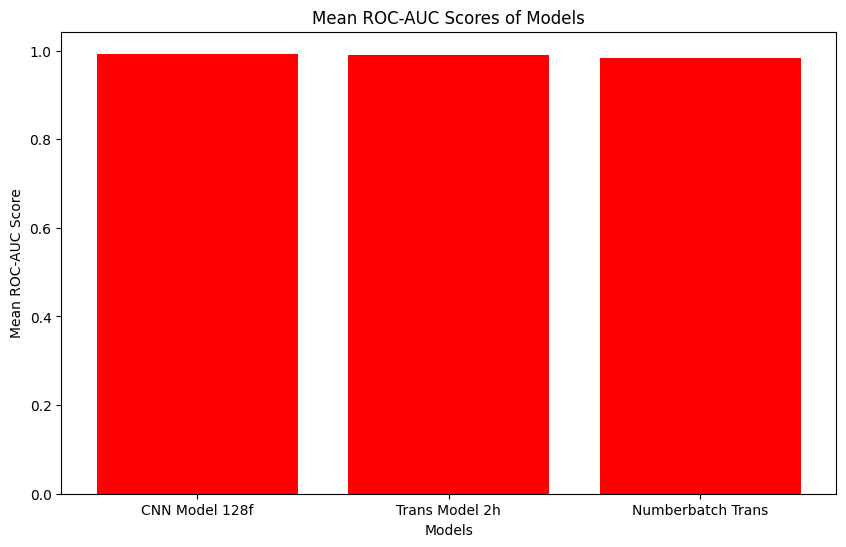

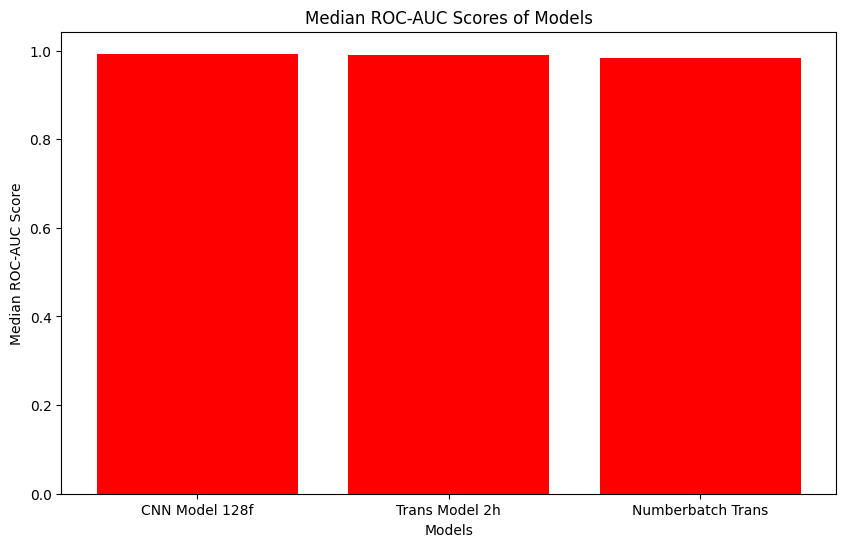

In [65]:
print_results_table(model_metrics_ex)
plot_model_scores(model_metrics_ex)

### Comparison of Numberbatch Model to GloVe

Overall, the Numberbatch Transformer Model performs slightly worse than the CNN Model with 128 Filters and the Transformer Model with 2 Heads in terms of precision, recall, and ROC-AUC. This suggests that while the Numberbatch embeddings are useful, the other models may have better feature representations for this specific task.